# Understanding trends of sales data by Time Series Analysis in SQL


**Dataset**: 
Use the [SuperStore Time Series Dataset from Kaggle](https://www.kaggle.com/datasets/blurredmachine/superstore-time-series-dataset) to work on this project. 
The dataset contains 20 columns, namely, Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID,
Customer Name, Segment, Country, and City, State Postal Code, Region, Product ID, Category,Sub-Category,Product Name, Sales	Quantity, Discount.


The aim is to get important insights on time series data and components' effects on sales data also how they changed in the period.
We will use SQL to perform the following:
* Analyzing the overall trend on sales.
* Comparing components across the same time range: sales volume and percentage by category, segment.
* Indexing to see percent change over time.
* Calculating running sales.
* Comparing sales volume period over period.

In [4]:
# import libraries
import pandas as pd
import sqlite3

In [5]:
# import data for the project
df=pd.read_csv(r'D:\Trang\SQL\SQL Projects\Marketing Analystics\superstore_test.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount
0,8002,CA-2015-110870,2015-12-12,2015-12-15,First Class,KD-16270,Karen Daniels,Consumer,United States,Los Angeles,California,90032,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.94,6,0.0
1,8003,CA-2015-110870,2015-12-12,2015-12-15,First Class,KD-16270,Karen Daniels,Consumer,United States,Los Angeles,California,90032,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.76,7,0.0
2,8004,CA-2014-143210,2014-12-01,2014-12-03,First Class,AA-10645,Anna Andreadi,Consumer,United States,Lowell,Massachusetts,1852,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.90,2,0.0
3,8005,CA-2014-143210,2014-12-01,2014-12-03,First Class,AA-10645,Anna Andreadi,Consumer,United States,Lowell,Massachusetts,1852,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.84,3,0.0
4,8006,CA-2014-143210,2014-12-01,2014-12-03,First Class,AA-10645,Anna Andreadi,Consumer,United States,Lowell,Massachusetts,1852,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.82,2,0.0


In [6]:
# sqlite3 library and create a connection
cnn = sqlite3.connect('sql_project.db')


In [7]:
#load the sql module
%load_ext sql
%sql sqlite:///sql_project.db

In [ ]:
df.to_sql('superstore_test', cnn)

## Analyze the overall trend on sales data
A trend is simply the direction in which the data is moving.

* Trend of monthly sales

In [15]:
%%sql
SELECT strftime('%m/%Y',[Order Date]) as sales_month,ROUND(SUM(Sales),2) as sales
FROM superstore_test
GROUP BY 1
ORDER BY strftime('%Y',[Order Date])

 * sqlite:///sql_project.db
Done.


sales_month,sales
01/2014,264.75
02/2014,1500.08
03/2014,6339.39
04/2014,6014.6
05/2014,6213.58
06/2014,4091.64
07/2014,6354.09
08/2014,5837.28
09/2014,14334.42
10/2014,4557.84


![monthly](http://localhost:8888/tree/Images/monthly.PNG)

The data has so much noise, we will aggregate at yearly level to have a better undestanding.

* Trend of yearly total sales

In [11]:
%%sql
SELECT strftime('%Y',[Order Date]) as sales_year,ROUND(SUM(Sales),2) as sales
FROM superstore_test
GROUP BY 1

 * sqlite:///sql_project.db
Done.


sales_year,sales
2014,73546.1
2015,97762.02
2016,140220.28
2017,146820.84


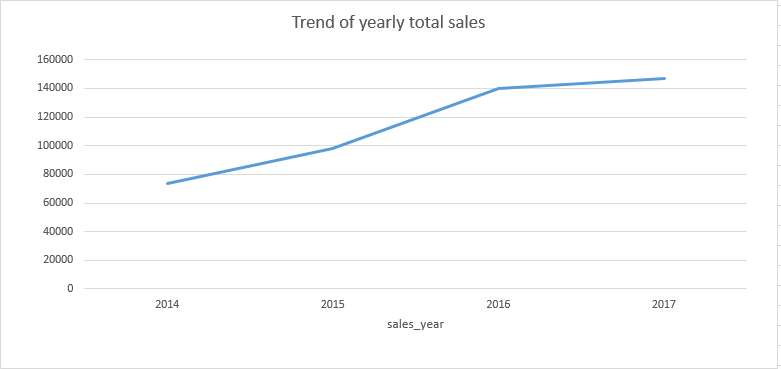

After graphing the data, we can see that sales generally increases overtime. The superstore has a dramatic increase from 2014 to 2016, and slows down in 2017.

## Comparing components across the same time range: sales volume and percentage by category, segment
Comparison between parts of the time series helps us to reveal trend patterns. It is also useful to analyze each component's contribution to the total sales and whether that has changed over time.


 * Sales volume and percentage by category

In [11]:
%%sql
SELECT strftime('%Y',[Order Date]) as sales_year, Category, SUM(Sales) as Sales,
SUM(SUM(Sales)) OVER(PARTITION BY strftime('%Y',[Order Date])) as total_sales,
SUM(Sales)*100 / SUM(SUM(Sales)) OVER(PARTITION BY strftime('%Y',[Order Date])) as pct_year
FROM superstore_test
GROUP BY 1,2


 * sqlite:///sql_project.db
Done.


sales_year,Category,Sales,total_sales,pct_year
2014,Furniture,21547.3095,73546.09649999999,29.297692910187287
2014,Office Supplies,29631.41099999999,73546.09649999999,40.28957675544343
2014,Technology,22367.375999999997,73546.09649999999,30.412730334369275
2015,Furniture,38098.9139,97762.0169,38.971080086217
2015,Office Supplies,29241.954999999998,97762.0169,29.91136632329442
2015,Technology,30421.147999999997,97762.0169,31.117553590488576
2016,Furniture,44330.80049999997,140220.27549999996,31.615114391926852
2016,Office Supplies,45056.653999999995,140220.27549999996,32.13276670533999
2016,Technology,50832.82099999999,140220.27549999996,36.25211890273315
2017,Furniture,50197.606,146820.83899999998,34.189701095496396


 * Sales volume and percentage by Segment

In [12]:
%%sql
SELECT strftime('%Y',[Order Date]) as sales_year,Segment, SUM(Sales) as Sales,
SUM(SUM(Sales)) OVER(PARTITION BY strftime('%Y',[Order Date])) as total_sales,
SUM(Sales)*100 / SUM(SUM(Sales)) OVER(PARTITION BY strftime('%Y',[Order Date])) as pct_year
FROM superstore_test
GROUP BY 1,2

 * sqlite:///sql_project.db
Done.


sales_year,Segment,Sales,total_sales,pct_year
2014,Consumer,48021.65599999998,73546.09649999997,65.29463599743869
2014,Corporate,19873.381500000003,73546.09649999997,27.021667288623554
2014,Home Office,5651.059,73546.09649999997,7.683696713937771
2015,Consumer,43587.26470000002,97762.0169,44.58507105534156
2015,Corporate,42649.52859999998,97762.0169,43.62586815657235
2015,Home Office,11525.2236,97762.0169,11.789060788086092
2016,Consumer,76649.44300000006,140220.27550000005,54.663594638280415
2016,Corporate,39075.7415,140220.27550000005,27.86739746492652
2016,Home Office,24495.090999999993,140220.27550000005,17.46900789679306
2017,Consumer,86405.92360000005,146820.83900000004,58.851266746950024


## Indexing to see percent change over time
Indexing is a way to undestand the changes in time series relative to the base period.


* Index to see Technology sales changing over time

  We index the Technology sales to the first year in the series,2014

In [13]:
%%sql
SELECT sales_year, sales,first_value(sales) OVER(ORDER BY sales_year) as ind_sales, (sales/first_value(sales) OVER(ORDER BY sales_year)-1)*100 as pct_index_sales
FROM(
SELECT strftime('%Y',[Order Date]) as sales_year,Category,SUM(Sales) as sales
FROM superstore_test
WHERE Category='Technology'
GROUP BY 1) cat

 * sqlite:///sql_project.db
Done.


sales_year,sales,ind_sales,pct_index_sales
2014,22367.375999999997,22367.375999999997,0.0
2015,30421.147999999997,22367.375999999997,36.00678058973035
2016,50832.82099999999,22367.375999999997,127.26322926748313
2017,52466.54199999999,22367.375999999997,134.56726439435718


* Index to see sales per category over time

  We index each category's sales to its sales in 2014

In [121]:
%%sql
SELECT sales_year, Category,sales, (sales/first_value(sales) OVER(PARTITION BY Category ORDER BY sales_year)-1)*100 as pct_from_index
FROM(
SELECT strftime('%Y',[Order Date]) as sales_year,Category,SUM(Sales) as sales
FROM superstore_test
GROUP BY 1,2) cat

 * sqlite:///sql_project.db
Done.


sales_year,Category,sales,pct_from_index
2014,Furniture,21547.3095,0.0
2015,Furniture,38098.9139,76.81517917585023
2016,Furniture,44330.80049999997,105.73705733423458
2017,Furniture,50197.606,132.96461212477598
2014,Office Supplies,29631.41099999999,0.0
2015,Office Supplies,29241.954999999998,-1.3143349805380233
2016,Office Supplies,45056.653999999995,52.05706538915751
2017,Office Supplies,44156.691000000006,49.01987286396865
2014,Technology,22367.375999999997,0.0
2015,Technology,30421.147999999997,36.00678058973035


## Rolling Sales

* Monthly sales and 12 month moving average sales

  Evaluate 12 monht moving averages using the window functions

In [58]:
%%sql
WITH sale_in_months as(
SELECT strftime('%m/%Y',[Order Date]) as sales_month,[Order Date], SUM(Sales) as Sales
FROM superstore_test
GROUP BY 1),

moving_month as(
SELECT sales_month, Sales,AVG(Sales) OVER(ORDER BY [Order Date] rows between 11 preceding and current row) as moving_avg, 
       COUNT(*) OVER(ORDER BY [Order Date] rows between 11 preceding and current row) as record_count
FROM sale_in_months)

SELECT *
FROM moving_month
WHERE record_count=12


 * sqlite:///sql_project.db
Done.


sales_month,Sales,moving_avg,record_count
12/2014,8252.367999999997,6128.841375,12
01/2015,7827.058000000001,6759.033375,12
02/2015,1031.17,6719.957208333333,12
03/2015,9307.493999999999,6967.299541666667,12
04/2015,3049.0495,6720.170333333333,12
05/2015,7352.632000000003,6815.0914999999995,12
06/2015,8629.858,7193.276666666668,12
07/2015,799.7000000000003,6730.410583333334,12
08/2015,7802.0062,6894.137766666668,12
09/2015,7914.536999999999,6359.147433333334,12


*  Monthly sales and cumulative annual sales

In [14]:
%%sql
SELECT strftime('%m/%Y',[Order Date]) as sales_months,SUM(Sales) as Sales,
SUM(SUM(Sales)) OVER(PARTITION BY strftime('%Y',[Order Date]) ORDER BY strftime('%m%Y',[Order Date] )) as sales_ytd
FROM superstore_test
GROUP BY 1

 * sqlite:///sql_project.db
Done.


sales_months,Sales,sales_ytd
01/2014,264.754,264.754
02/2014,1500.0839999999998,1764.8379999999997
03/2014,6339.386,8104.224
04/2014,6014.5999999999985,14118.823999999999
05/2014,6213.578,20332.402
06/2014,4091.6360000000004,24424.038
07/2014,6354.093,30778.131
08/2014,5837.28,36615.411
09/2014,14334.421000000002,50949.832
10/2014,4557.842,55507.674


## Period over period comparison

* Technology sales difference over date

  Compare a given row's sales to preceding sales.

In [24]:
%%sql
SELECT Category, [Order Date], Sales,
lag([Order Date]) OVER(PARTITION BY Category ORDER BY [Order Date]) as prev_date,
lag(Sales) OVER (PARTITION BY Category ORDER BY [Order Date]) as prev_sales,
Sales-lag(Sales) OVER (PARTITION BY Category ORDER BY [Order Date]) as sales_diff_date

FROM superstore_test
WHERE Category='Technology'


 * sqlite:///sql_project.db
Done.


Category,Order Date,Sales,prev_date,prev_sales,sales_diff_date
Technology,2014-02-02,180.96,None,None,None
Technology,2014-02-14,239.97,2014-02-02,180.96,59.00999999999999
Technology,2014-03-02,151.20000000000002,2014-02-14,239.97,-88.76999999999998
Technology,2014-03-05,479.97,2014-03-02,151.20000000000002,328.77
Technology,2014-03-14,574.91,2014-03-05,479.97,94.93999999999994
Technology,2014-03-25,45.48,2014-03-14,574.91,-529.43
Technology,2014-03-26,28.784,2014-03-25,45.48,-16.695999999999998
Technology,2014-03-28,302.376,2014-03-26,28.784,273.592
Technology,2014-04-03,62.31,2014-03-28,302.376,-240.06599999999997
Technology,2014-04-03,159.98,2014-04-03,62.31,97.66999999999999


* Technology Sales difference over month

  Compare the sales in this month with sales of last month.

In [21]:
%%sql
SELECT Category, sales_months, Sales,
lag(sales_months) OVER(PARTITION BY Category ORDER BY sales_months) as prev_month,
lag(Sales) OVER (PARTITION BY Category ORDER BY sales_months) as prev_sales,
Sales-lag(Sales) OVER (PARTITION BY Category ORDER BY sales_months) as sales_diff_month

FROM(
SELECT strftime('%m/%Y',[Order Date]) as sales_months,Category,SUM(Sales) as Sales
FROM superstore_test
WHERE Category='Technology'
GROUP BY 1
)tech

 * sqlite:///sql_project.db
Done.


Category,sales_months,Sales,prev_month,prev_sales,sales_diff_month
Technology,01/2015,379.066,None,None,None
Technology,01/2016,1916.5880000000002,01/2015,379.066,1537.5220000000002
Technology,01/2017,6440.112000000001,01/2016,1916.5880000000002,4523.524000000001
Technology,02/2014,420.93,01/2017,6440.112000000001,-6019.182000000001
Technology,02/2015,18.528,02/2014,420.93,-402.402
Technology,02/2016,9836.158000000001,02/2015,18.528,9817.630000000001
Technology,02/2017,1042.3940000000002,02/2016,9836.158000000001,-8793.764000000001
Technology,03/2014,1582.72,02/2017,1042.3940000000002,540.3259999999998
Technology,03/2015,999.7180000000001,03/2014,1582.72,-583.002
Technology,03/2016,4357.102,03/2015,999.7180000000001,3357.384


* Percent growth for Technology from previous year

In [21]:
%%sql
WITH CTE as(
SELECT Category,strftime('%Y',[Order Date]) as year_sales, SUM(Sales) as Sales
FROM superstore_test
WHERE Category='Technology'
GROUP BY 2)
SELECT Category, year_sales,Sales,lag(year_sales) OVER(ORDER BY year_sales) as lag_year,
lag(Sales) OVER(ORDER BY year_sales) as prev_sales, round((sales/lag(Sales) OVER(ORDER BY year_sales)-1)*100,2) as pct_growth_from_prev
FROM CTE



 * sqlite:///sql_project.db
Done.


Category,year_sales,Sales,lag_year,prev_sales,pct_growth_from_prev
Technology,2014,22367.375999999997,None,None,None
Technology,2015,30421.147999999997,2014,22367.375999999997,36.01
Technology,2016,50832.82099999999,2015,30421.147999999997,67.1
Technology,2017,52466.54199999999,2016,50832.82099999999,3.21


* Sales of same months over year

In [10]:
%%sql
SELECT strftime('%m',[Order Date]) as month_number,
ROUND(AVG(CASE WHEN strftime('%Y',[Order Date])='2014' THEN Sales END),2) as sales_2014,
ROUND(AVG(CASE WHEN strftime('%Y',[Order Date])='2015' THEN Sales END),2) as sales_2015,
ROUND(AVG(CASE WHEN strftime('%Y',[Order Date])='2016'THEN Sales END),2) as sales_2016,
ROUND(AVG(CASE WHEN strftime('%Y',[Order Date])='2017' THEN Sales END),2) as sales_2017
FROM superstore_test
GROUP BY 1
ORDER BY 1

 * sqlite:///sql_project.db
Done.


month_number,sales_2014,sales_2015,sales_2016,sales_2017
01,37.82,711.55,374.98,287.7
02,78.95,114.57,498.08,161.71
03,176.09,357.98,186.79,388.24
04,231.33,105.14,237.1,158.38
05,258.9,193.49,143.42,201.87
06,215.35,210.48,349.3,323.86
07,176.5,53.31,196.72,201.64
08,157.76,210.87,177.26,298.38
09,238.91,123.66,231.29,183.84
10,126.61,193.82,287.81,308.18
